In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as st
import seaborn as sns

In [3]:
filename = "resources/employers_clean.csv"
employers_df=pd.read_csv(filename)

In [4]:
employers_df.head()

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino


In [5]:
employers_reduced = employers_df[employers_df["TICKER"] != 'none'].reset_index(drop=True)

In [6]:
employers_reduced.head(24)

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino
5,6,Delta Air Lines,DAL,Transportation and Logistics,United States,"80,000",4.2,Atlanta
6,7,Costco Wholesale,COST,Retail and Wholesale,United States,"288,000",4.0,Issaquah
7,8,Adobe,ADBE,"IT, Internet, Software & Services",United States,"25,988",4.4,San Jose
8,9,Southwest Airlines,LUV,Transportation and Logistics,United States,"55,093",4.4,Dallas
9,10,Dell Technologies,DELL,"Semiconductors, Electronics, Electrical Engine...",United States,"133,000",4.3,Round Rock


In [7]:
employers_reduced['1 year stock performance']=""
employers_reduced['return on equity']=""
employers_reduced['Analyst Recommendation Mean']=""
employers_reduced['Operating Income']=""


employers_reduced

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon,,,,
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond,,,,
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk,,,,
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View,,,,
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
80,95,DBS Bank,D05.SI,Banking and Financial Services,Singapore,"33,000",3.9,Singapore,,,,
81,96,Mastercard,MA,Banking and Financial Services,United States,"24,000",4.3,Purchase,,,,
82,97,Electricite de France,EDF.PA,Utilities,France,"167,157",4.0,Paris,,,,
83,98,Verbund,VER.VI,Utilities,Austria,"3,184",4.7,Vienna,,,,


In [8]:
print('Finding stock data..')
print("-"*20)
for index,row in employers_reduced.iterrows():
    company=employers_reduced.loc[index,'NAME']
    ticker=employers_reduced.loc[index,'TICKER']
    stock_data=yf.Ticker(ticker)
    try:
        employers_reduced.loc[index, "1 year stock performance"]=round(stock_data.info["52WeekChange"]*100,2)
        employers_reduced.loc[index, "return on equity"]=round(stock_data.info["returnOnEquity"]*100,2)
        employers_reduced.loc[index, "Analyst Recommendation Mean"]=stock_data.info['recommendationMean']
        employers_reduced.loc[index, 'Operating Income']=stock_data.info['ebitda']
    except:
        employers_reduced.loc[index, "1 year stock performance"]="No data found"
        employers_reduced.loc[index, "return on equity"]="No data found"
        employers_reduced.loc[index, "Analyst Recommendation Mean"]="No data found"
        employers_reduced.loc[index, "Operating Income"]="No data found"
        
    print(f"{company} ({ticker}): {employers_reduced.loc[index, '1 year stock performance']}% 1yr stock performance; {employers_reduced.loc[index, 'return on equity']}% RoE; Mean Analyst Rec: {employers_reduced.loc[index, 'Analyst Recommendation Mean']}; EBITDA: {employers_reduced.loc[index, 'Operating Income']}")
    print("-"*20)

employers_reduced

Finding stock data..
--------------------
Samsung Electronics (005930.KS): -23.45% 1yr stock performance; 13.29% RoE; Mean Analyst Rec: 1.8; EBITDA: 90943910838272
--------------------
Microsoft (MSFT): -28.1% 1yr stock performance; 42.88% RoE; Mean Analyst Rec: 1.8; EBITDA: 98841001984
--------------------
IBM (IBM): 8.39% 1yr stock performance; 6.48% RoE; Mean Analyst Rec: 2.5; EBITDA: 12010000384
--------------------
Alphabet (GOOG): -37.31% 1yr stock performance; 26.89% RoE; Mean Analyst Rec: 1.5; EBITDA: 93733003264
--------------------
Apple (AAPL): -25.52% 1yr stock performance; 175.46% RoE; Mean Analyst Rec: 2; EBITDA: 130541002752
--------------------
Delta Air Lines (DAL): -6.21% 1yr stock performance; 2.25% RoE; Mean Analyst Rec: 1.7; EBITDA: 4472000000
--------------------
Costco Wholesale (COST): -8.44% 1yr stock performance; 29.32% RoE; Mean Analyst Rec: 2.1; EBITDA: 9648000000
--------------------
Adobe (ADBE): -36.38% 1yr stock performance; 32.97% RoE; Mean Analyst Rec:

Volvo Group (VOLCAR-B.ST): -42.31% 1yr stock performance; 17.51% RoE; Mean Analyst Rec: None; EBITDA: 26701000704
--------------------
Alibaba Group (BABA): -19.34% 1yr stock performance; -0.12% RoE; Mean Analyst Rec: 1.9; EBITDA: 146090000384
--------------------
Intel (INTC): -47.18% 1yr stock performance; 14.0% RoE; Mean Analyst Rec: 3.2; EBITDA: 20846000128
--------------------
Viatris (VTRS): -21.95% 1yr stock performance; 3.99% RoE; Mean Analyst Rec: 2.6; EBITDA: 5998499840
--------------------
Mitsubishi Electric (8058.T): 10.8% 1yr stock performance; 17.49% RoE; Mean Analyst Rec: 2; EBITDA: 1406378967040
--------------------
Pirelli (PIRC.MI): -30.95% 1yr stock performance; 8.42% RoE; Mean Analyst Rec: 2; EBITDA: 1228393984
--------------------
Enel (ENEL.MI): -19.11% 1yr stock performance; 6.64% RoE; Mean Analyst Rec: 2.1; EBITDA: 14380000256
--------------------
Naver (035420.KS): -44.14% 1yr stock performance; 3.47% RoE; Mean Analyst Rec: 2; EBITDA: 1706498850816
-----------

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon,-23.45,13.29,1.8,90943910838272
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond,-28.1,42.88,1.8,98841001984
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk,8.39,6.48,2.5,12010000384
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View,-37.31,26.89,1.5,93733003264
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino,-25.52,175.46,2,130541002752
...,...,...,...,...,...,...,...,...,...,...,...,...
80,95,DBS Bank,D05.SI,Banking and Financial Services,Singapore,"33,000",3.9,Singapore,-2.68,11.79,2,None
81,96,Mastercard,MA,Banking and Financial Services,United States,"24,000",4.3,Purchase,1.01,147.74,1.8,13080000512
82,97,Electricite de France,EDF.PA,Utilities,France,"167,157",4.0,Paris,18.17,-6.42,2.6,7233999872
83,98,Verbund,VER.VI,Utilities,Austria,"3,184",4.7,Vienna,-19.57,26.71,3.2,2274543104


In [9]:
employers_reduced["Operating Income"].astype(str)
employers_filter=employers_reduced.dropna(axis=0,how='any')
employers_filter=employers_filter.loc[employers_filter['1 year stock performance']!= "No data found"]
employers_filter["Operating Income"].astype(int)
employers_filter["EMPLOYEES"]=employers_filter["EMPLOYEES"].str.replace(',', '').astype(int)


employers_filter.head()



,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income
50,60,MTU Aero Engines,MTX.DE,Aerospace & Defense,Germany,10000,3.9,Munich,12.83,9.04,2.1,650000000
52,63,L'Oreal,OR.PA,Packaged Goods,France,85252,4.0,Clichy,-8.55,19.65,2.5,7413499904
56,67,Netflix,NFLX,Media & Advertising,United States,11300,4.3,Los Gatos,-39.03,28.14,2.4,6021976064
57,68,Carl-Zeiss-Stiftung,AFX.DE,"Engineering, Manufacturing",Germany,35375,3.9,Oberkochen,-22.53,15.96,2.3,419492992
58,69,"Merck KGaA, Darmstadt, Germany and its affiliates",MRK.DE,Drugs & Biotechnology,Germany,60334,4.1,Darmstadt,-4.9,14.22,1.8,6503000064
59,70,Wacker Chemie,WCH.DE,"Construction, Oil & Gas Operations, Mining and...",Germany,14400,4.0,Munich,-16.83,36.49,2.2,2048400000
61,72,Prada,1913.HK,"Clothing, Shoes, Sports Equipment",Italy,13140,3.6,Milan,-1.78,12.63,2.2,841483008
62,73,General Motors,GM,Automotive (Automotive and Suppliers),United States,157000,4.0,Detroit,-39.19,14.56,2.2,18012999680
63,74,T Rowe Price,TROW,Banking and Financial Services,United States,7529,3.8,Baltimore,-35.19,19.89,3.5,3268300032
65,76,Alibaba Group,BABA,"IT, Internet, Software & Services",China,254941,3.8,Hangzhou,-19.34,-0.12,1.9,146090000384


In [10]:
employers_filter["Operating income per employee"]=employers_filter["Operating Income"]/employers_filter["EMPLOYEES"]
# pd.options.display.float_format = '{:,.2f}'.format
employers_filter["Operating income per employee"]=employers_filter["Operating income per employee"].astype(int)
employers_filter

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income,Operating income per employee
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,266673,3.8,Suwon,-23.45,13.29,1.8,90943910838272,341031566
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,221000,4.4,Redmond,-28.1,42.88,1.8,98841001984,447244
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,250000,4.2,Armonk,8.39,6.48,2.5,12010000384,48040
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,156500,4.5,Mountain View,-37.31,26.89,1.5,93733003264,598932
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,154000,4.1,Cupertino,-25.52,175.46,2,130541002752,847668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,94,De'Longhi,DLG.MI,"Engineering, Manufacturing",Italy,10000,4.0,Treviso,-20.61,11.61,2.5,321176000,32117
81,96,Mastercard,MA,Banking and Financial Services,United States,24000,4.3,Purchase,1.01,147.74,1.8,13080000512,545000
82,97,Electricite de France,EDF.PA,Utilities,France,167157,4.0,Paris,18.17,-6.42,2.6,7233999872,43276
83,98,Verbund,VER.VI,Utilities,Austria,3184,4.7,Vienna,-19.57,26.71,3.2,2274543104,714366


In [11]:
stock = employers_filter['1 year stock performance'].astype(float)
stock_z=st.zscore(stock)

roe= employers_filter['return on equity'].astype(float)
roe_z=st.zscore(roe)

op_emp=employers_filter['Operating income per employee'].astype(float)
op_emp_z=st.zscore(op_emp)


In [12]:
employers_filter.head(6)

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income,Operating income per employee
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,266673,3.8,Suwon,-23.45,13.29,1.8,90943910838272,341031566
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,221000,4.4,Redmond,-28.1,42.88,1.8,98841001984,447244
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,250000,4.2,Armonk,8.39,6.48,2.5,12010000384,48040
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,156500,4.5,Mountain View,-37.31,26.89,1.5,93733003264,598932
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,154000,4.1,Cupertino,-25.52,175.46,2,130541002752,847668
5,6,Delta Air Lines,DAL,Transportation and Logistics,United States,80000,4.2,Atlanta,-6.21,2.25,1.7,4472000000,55900


In [114]:
rank=employers_filter["RANK"]
glassdoor=employers_filter["Glassdoor Rating"]
rec=employers_filter["Analyst Recommendation Mean"]
stock=employers_filter["1 year stock performance"]


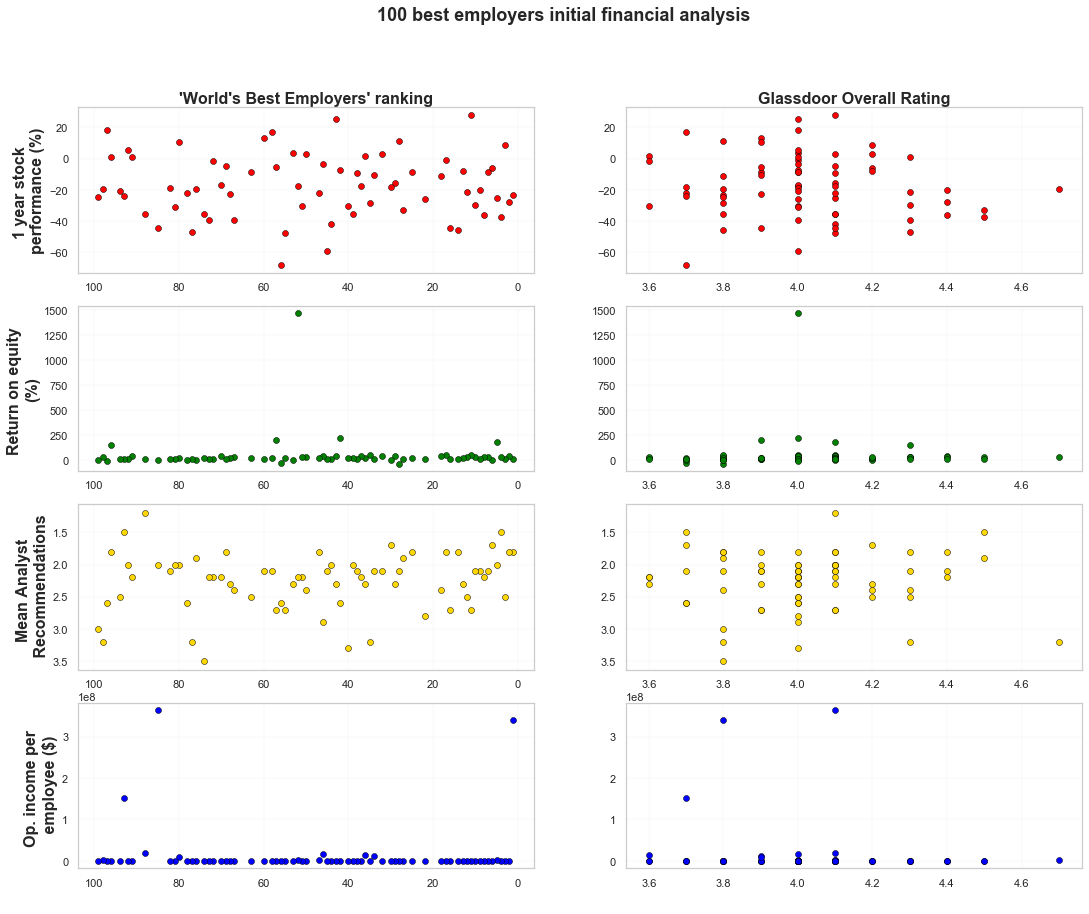

In [145]:
fig,axes=plt.subplots(4,2, figsize=(18,14))
fig.suptitle('100 best employers initial financial analysis', size=18, weight='bold')

ax1=sns.scatterplot(ax=axes[0,0], data=employers_filter, x='RANK',y='1 year stock performance',color='red',edgecolor="black")
axes[0,0].invert_xaxis()
axes[0,0].set_ylabel('1 year stock \nperformance (%)',fontsize = 16, weight='bold')
axes[0,0].set_xlabel("'World's Best Employers' ranking",fontsize = 16, weight='bold')
axes[0,0].xaxis.set_label_position('top') 

sns.scatterplot(ax=axes[0,1], data=employers_filter, x='Glassdoor Rating',y='1 year stock performance',color='red',edgecolor="black")

axes[0,1].set_ylabel(' ',fontsize = 16)
axes[0,1].set_xlabel("Glassdoor Overall Rating",fontsize = 16, weight='bold')
axes[0,1].xaxis.set_label_position('top') 

sns.scatterplot(ax=axes[1,0], data=employers_filter, x='RANK',y='return on equity',color='green',edgecolor="black")
axes[1,0].invert_xaxis()
axes[1,0].set_ylabel('Return on equity \n(%)',fontsize = 16, weight='bold')
axes[1,0].set_xlabel(" ",fontsize = 16)


sns.scatterplot(ax=axes[1,1], data=employers_filter, x='Glassdoor Rating',y='return on equity',color='green',edgecolor="black")
axes[1,1].set_ylabel(' ',fontsize = 16)
axes[1,1].set_xlabel(" ",fontsize = 16)


sns.scatterplot(ax=axes[2,0], data=employers_filter, x='RANK',y='Analyst Recommendation Mean',color='gold',edgecolor="black")
axes[2,0].invert_xaxis()
axes[2,0].invert_yaxis()
axes[2,0].set_ylabel('Mean Analyst \n Recommendations',fontsize = 16, weight='bold')
axes[2,0].set_xlabel(" ",fontsize = 16)


sns.scatterplot(ax=axes[2,1], data=employers_filter, x='Glassdoor Rating',y='Analyst Recommendation Mean',color='gold',edgecolor="black")
axes[2,1].set_ylabel(' ',fontsize = 16)
axes[2,1].invert_yaxis()
axes[2,1].set_xlabel(" ",fontsize = 16)

sns.scatterplot(ax=axes[3,0], data=employers_filter, x='RANK',y='Operating income per employee',color='blue',edgecolor="black")
axes[3,0].invert_xaxis()
axes[3,0].set_ylabel('Op. income per \n employee ($)',fontsize = 16, weight='bold')
axes[3,0].set_xlabel(" ",fontsize = 16)


sns.scatterplot(ax=axes[3,1], data=employers_filter, x='Glassdoor Rating',y='Operating income per employee',color='blue',edgecolor="black")
axes[3,1].set_ylabel(" ",fontsize = 16)
axes[3,1].set_xlabel(" ",fontsize = 16)


plt.show()

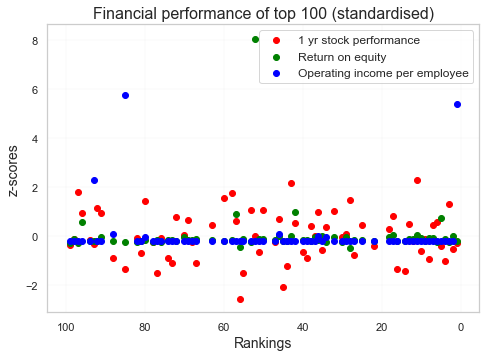

In [126]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax1=ax.scatter(rank,stock_z,color='Red',label='1 yr stock performance')
ax2=ax.scatter(rank,roe_z,color='green',label='Return on equity')
ax3=ax.scatter(rank,op_emp_z,color='blue',label="Operating income per employee")
ax.legend(handles=[ax1,ax2,ax3],prop={'size':12})
ax.set_xlabel("Rankings", size=14)
ax.set_ylabel("z-scores", size=14)
ax.set_title("Financial performance of top 100 (standardised)",size=16)
ax.invert_xaxis()
plt.show()